In [7]:
# 5. K-Means

In [8]:
import os
os.environ['OMP_NUM_THREADS'] = '1' # 경고 대응

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Stolio_Movie/ScikitLearn/KMeansData.csv')
dataset[:5]

,hour,score
0,7.33,73
1,3.71,55
2,3.43,55
3,3.06,89
4,3.33,79


In [11]:
input_data = dataset.iloc[:,:].values
# (=) input_data = dataset.values
# input_data = dataset.to_numpy() # 공식 홈페이지 권장
input_data[:5]

array([[ 7.33, 73.  ],
       [ 3.71, 55.  ],
       [ 3.43, 55.  ],
       [ 3.06, 89.  ],
       [ 3.33, 79.  ]])

In [12]:
# 데이터 시각화 (전체 데이터 분포 확인)

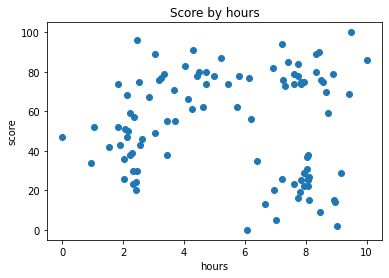

In [13]:
plt.scatter(input_data[:,0], input_data[:,1]) # x축 : hours, y축 : score (전체행,0번째 열 or 1번째 열) 
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [14]:
# 데이터 시각화(축 범위 동일)

AttributeError: ignored

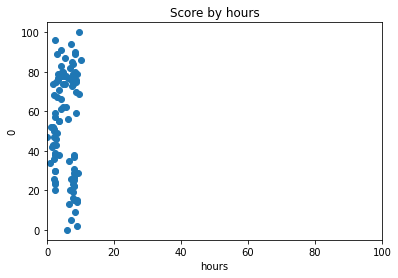

In [15]:
plt.scatter(input_data[:,0], input_data[:,1]) # x축 : hours, y축 : score (전체행,0번째 열 or 1번째 열) 
plt.title('Score by hours')
plt.xlabel('hours')
plt.xlim(0,100)
plt.ylabel('score')
plt.ylabel(0,100) # x축과 y축의 범위를 똑같이 맞춰주는 이유 : 눈으로 보는 거리와 컴퓨터로 계산한 거리가 다를 수 있기 때문이다.
plt.show()

In [16]:
# 피처 스케일링(Feature Scaling)

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
input_data = sc.fit_transform(input_data)
input_data[:5]

array([[ 0.68729921,  0.73538376],
       [-0.66687438,  0.04198891],
       [-0.77161709,  0.04198891],
       [-0.9100271 ,  1.35173473],
       [-0.8090252 ,  0.96651537]])

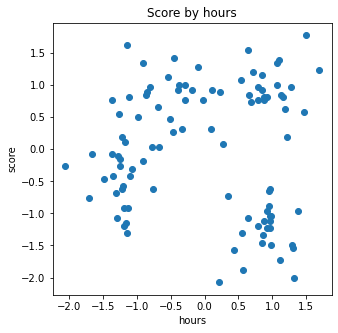

In [18]:
plt.figure(figsize=(5,5)) # 그래프를 정사각형으로 만드는 과정
plt.scatter(input_data[:,0], input_data[:,1]) # x축 : hours, y축 : score (전체행,0번째 열 or 1번째 열) 
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()
# 스케일링 된 데이터로 보면 똑같은 범주를 가진 데이터로 그래프가 보기 편하게 되어있다.

In [19]:
# 최적의 K값 찾기(엘보우 방식 Elbow Method)

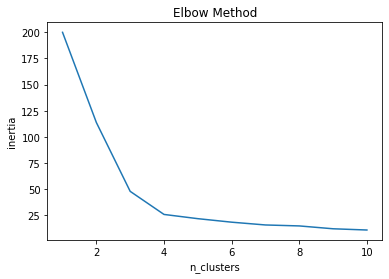

In [20]:
from sklearn.cluster import KMeans
inertia_list=[]
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state=0)
  kmeans.fit(input_data)
  inertia_list.append(kmeans.inertia_) # 각 지점으로부터 클러스터의 중심(centroid) 까지의 거리의 제곱의 합

plt.plot(range(1,11), inertia_list)
plt.title('Elbow Method')
plt.xlabel('n_clusters')
plt.ylabel('inertia')
plt.show()

In [21]:
# 최적의 K (4) 값으로 KMeans 학습

In [22]:
# n_clusters = 4 # 최적의 K값 ==> 기울기가 갑자기 완만해지는 부분

In [23]:
K = 4 

In [24]:
kmeans = KMeans(n_clusters = K, random_state=0) # init의 디폴트 값이 kmeans++
# kmeans.fit(input_data)
target_kmeans = kmeans.fit_predict(input_data)

In [25]:
target_kmeans

array([2, 3, 3, 0, 0, 1, 1, 0, 2, 0, 0, 3, 1, 3, 3, 0, 1, 2, 3, 0, 1, 0,
       3, 1, 2, 2, 3, 3, 3, 3, 1, 1, 3, 0, 2, 2, 3, 0, 0, 0, 3, 1, 2, 3,
       3, 2, 1, 0, 1, 1, 2, 0, 1, 1, 0, 0, 0, 0, 3, 1, 1, 2, 2, 2, 2, 1,
       1, 0, 1, 2, 3, 2, 2, 2, 3, 3, 3, 3, 0, 2, 1, 2, 1, 1, 2, 0, 3, 1,
       2, 3, 0, 1, 0, 2, 3, 2, 2, 0, 1, 3], dtype=int32)

In [26]:
# 데이터 시각화 (최적의 K)

In [35]:
centers = kmeans.cluster_centers_ # 클러스터의 중심점 (centroid) 좌표 
centers

array([[-0.57163957,  0.85415973],
       [ 0.8837666 , -1.26929779],
       [ 0.94107583,  0.93569782],
       [-1.22698889, -0.46768593]])

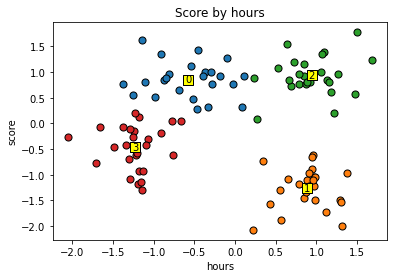

In [43]:
for cluster in range(K):
  plt.scatter(input_data[target_kmeans == cluster,0], input_data[target_kmeans == cluster, 1 ], s=50, edgecolor='black') # 각 데이터
  # plt.scatter(x값 (인덱스 0), y값 (인덱스 1), s : 점의 크기, edgecolor : 점의 테두리 색이 검정) 
  plt.scatter(centers[cluster, 0], centers[cluster, 1], s=100, edgecolor = 'black', color='yellow', marker = 's') # 중심점 네모
  # color: 점의 색깔, marker : 점의 모양
  plt.text(centers[cluster, 0], centers[cluster, 1], cluster, va='center',ha='center') # 클러스터 텍스트 출력
  # cluster: 클러스터 중심점 텍스트 찍기 ,va : 세로위치, ha : 가로위치) 

plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [44]:
# 데이터 시각화(스케일링 원복)

In [47]:
input_org = sc.inverse_transform(input_data) # Feature Scaling 된 데이터를 다시 원복
input_org[:5]

array([[ 7.33, 73.  ],
       [ 3.71, 55.  ],
       [ 3.43, 55.  ],
       [ 3.06, 89.  ],
       [ 3.33, 79.  ]])

In [49]:
centers_org = sc.inverse_transform(centers) # 중심점 원복
centers_org

array([[ 3.96458333, 76.08333333],
       [ 7.8552    , 20.96      ],
       [ 8.0084    , 78.2       ],
       [ 2.21269231, 41.76923077]])

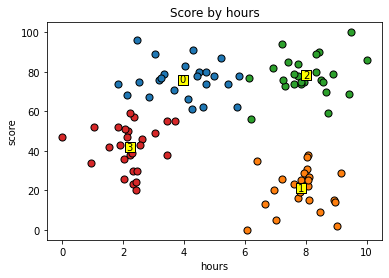

In [50]:
for cluster in range(K):
  plt.scatter(input_org[target_kmeans == cluster,0], input_org[target_kmeans == cluster, 1 ], s=50, edgecolor='black') # 각 데이터
  # plt.scatter(x값 (인덱스 0), y값 (인덱스 1), s : 점의 크기, edgecolor : 점의 테두리 색이 검정) 
  plt.scatter(centers_org[cluster, 0], centers_org[cluster, 1], s=100, edgecolor = 'black', color='yellow', marker = 's') # 중심점 네모
  # color: 점의 색깔, marker : 점의 모양
  plt.text(centers_org[cluster, 0], centers_org[cluster, 1], cluster, va='center',ha='center') # 클러스터 텍스트 출력
  # cluster: 클러스터 중심점 텍스트 찍기 ,va : 세로위치, ha : 가로위치) 

plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()